## Age Prediction Model 
As we see its test.csv contain lots of age missing which is main feature of out predictor so we create model for this age.we use test1.csv because passanger name storey dont mention fare so we use 21.52 for it in test1.csv

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data/age.csv')
df = df.drop(['Name','PassengerId'],axis=1)
df = df.dropna()
df

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S
5,3,male,14.0,0,0,9.2250,S
6,3,female,30.0,0,0,7.6292,Q
7,2,male,26.0,1,1,29.0000,S
8,3,female,18.0,0,0,7.2292,C
9,3,male,21.0,2,0,24.1500,S


In [3]:
from sklearn.feature_extraction import DictVectorizer
vec = DictVectorizer(sparse=False)
df_dict = df.to_dict(orient = 'records')
df_dict_feature = vec.fit_transform(df_dict)
df_feature = vec.get_feature_names()
print df_feature
df_dict_feature

['Age', 'Embarked=C', 'Embarked=Q', 'Embarked=S', 'Fare', 'Parch', 'Pclass', 'Sex=female', 'Sex=male', 'SibSp']


array([[ 34.5,   0. ,   1. , ...,   0. ,   1. ,   0. ],
       [ 47. ,   0. ,   0. , ...,   1. ,   0. ,   1. ],
       [ 62. ,   0. ,   1. , ...,   0. ,   1. ,   0. ],
       ..., 
       [ 19. ,   0. ,   0. , ...,   1. ,   0. ,   0. ],
       [ 26. ,   1. ,   0. , ...,   0. ,   1. ,   0. ],
       [ 32. ,   0. ,   1. , ...,   0. ,   1. ,   0. ]])

In [4]:
df_final = pd.DataFrame(df_dict_feature,columns=df_feature)
X = df_final.drop('Age',axis=1)
y = df_final['Age']
df_final

,Age,Embarked=C,Embarked=Q,Embarked=S,Fare,Parch,Pclass,Sex=female,Sex=male,SibSp
0,34.5,0.0,1.0,0.0,7.8292,0.0,3.0,0.0,1.0,0.0
1,47.0,0.0,0.0,1.0,7.0000,0.0,3.0,1.0,0.0,1.0
2,62.0,0.0,1.0,0.0,9.6875,0.0,2.0,0.0,1.0,0.0
3,27.0,0.0,0.0,1.0,8.6625,0.0,3.0,0.0,1.0,0.0
4,22.0,0.0,0.0,1.0,12.2875,1.0,3.0,1.0,0.0,1.0
5,14.0,0.0,0.0,1.0,9.2250,0.0,3.0,0.0,1.0,0.0
6,30.0,0.0,1.0,0.0,7.6292,0.0,3.0,1.0,0.0,0.0
7,26.0,0.0,0.0,1.0,29.0000,1.0,2.0,0.0,1.0,1.0
8,18.0,1.0,0.0,0.0,7.2292,0.0,3.0,1.0,0.0,0.0
9,21.0,0.0,0.0,1.0,24.1500,0.0,3.0,0.0,1.0,2.0


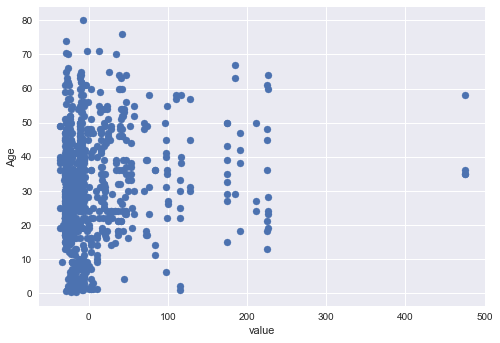

In [5]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
pca.fit(X,y)
X_reduced = pca.transform(X)
plt.scatter(X_reduced,y)
plt.xlabel('value')
plt.ylabel('Age')
plt.show()

In [6]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(normalize=True)
print X
model.fit(X,y)
model.score(X,y)

      Embarked=C  Embarked=Q  Embarked=S      Fare  Parch  Pclass  Sex=female  \
0            0.0         1.0         0.0    7.8292    0.0     3.0         0.0   
1            0.0         0.0         1.0    7.0000    0.0     3.0         1.0   
2            0.0         1.0         0.0    9.6875    0.0     2.0         0.0   
3            0.0         0.0         1.0    8.6625    0.0     3.0         0.0   
4            0.0         0.0         1.0   12.2875    1.0     3.0         1.0   
5            0.0         0.0         1.0    9.2250    0.0     3.0         0.0   
6            0.0         1.0         0.0    7.6292    0.0     3.0         1.0   
7            0.0         0.0         1.0   29.0000    1.0     2.0         0.0   
8            1.0         0.0         0.0    7.2292    0.0     3.0         1.0   
9            0.0         0.0         1.0   24.1500    0.0     3.0         0.0   
10           0.0         0.0         1.0   26.0000    0.0     1.0         0.0   
11           0.0         0.0

0.23388180722407226

In [7]:
df_test = pd.read_csv('data/test1.csv')
df_test_clean = df_test.drop(['Cabin','PassengerId','Name','Ticket'],axis=1)
df_test_clean

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,3,male,34.5,0,0,7.8292,Q,NaN,NaN,NaN
1,3,female,47.0,1,0,7.0000,S,NaN,NaN,NaN
2,2,male,62.0,0,0,9.6875,Q,NaN,NaN,NaN
3,3,male,27.0,0,0,8.6625,S,NaN,NaN,NaN
4,3,female,22.0,1,1,12.2875,S,NaN,NaN,NaN
5,3,male,14.0,0,0,9.2250,S,NaN,NaN,NaN
6,3,female,30.0,0,0,7.6292,Q,NaN,NaN,NaN
7,2,male,26.0,1,1,29.0000,S,NaN,NaN,86.0
8,3,female,18.0,0,0,7.2292,1048243,NaN,NaN,NaN
9,3,male,21.0,2,0,24.1500,S,NaN,NaN,NaN


In [8]:
df_tclean_null = df_test_clean[df_test_clean.isnull().any(axis=1)]

In [9]:
from sklearn.feature_extraction import DictVectorizer
vec_test = DictVectorizer(sparse=False)
df_dict_nclean = df_tclean_null.to_dict(orient = 'records')
df_dict_feature2 = vec_test.fit_transform(df_dict_nclean)
df_feature_nclean = vec_test.get_feature_names()
print df_feature_nclean
df_dict_feature2

['Age', 'Embarked=1048243', 'Embarked=C', 'Embarked=Q', 'Embarked=S', 'Fare', 'Parch', 'Pclass', 'Sex=female', 'Sex=male', 'SibSp', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13']


array([[ 34.5,   0. ,   0. , ...,   nan,   nan,   nan],
       [ 47. ,   0. ,   0. , ...,   nan,   nan,   nan],
       [ 62. ,   0. ,   0. , ...,   nan,   nan,   nan],
       ..., 
       [ 38.5,   0. ,   0. , ...,   nan,   nan,   nan],
       [  nan,   0. ,   0. , ...,   nan,   nan,   nan],
       [  nan,   0. ,   1. , ...,   nan,   nan,   nan]])

In [10]:
df_final_test = pd.DataFrame(df_dict_feature2,columns=df_feature_nclean)
print df_final_test.shape
X_test = df_final_test.drop('Age',axis=1)
X_test = X_test.drop(['Embarked=1048243','Unnamed: 11','Unnamed: 12','Unnamed: 13'],axis=1)
print X_test

(418, 14)
     Embarked=C  Embarked=Q  Embarked=S      Fare  Parch  Pclass  Sex=female  \
0           0.0         1.0         0.0    7.8292    0.0     3.0         0.0   
1           0.0         0.0         1.0    7.0000    0.0     3.0         1.0   
2           0.0         1.0         0.0    9.6875    0.0     2.0         0.0   
3           0.0         0.0         1.0    8.6625    0.0     3.0         0.0   
4           0.0         0.0         1.0   12.2875    1.0     3.0         1.0   
5           0.0         0.0         1.0    9.2250    0.0     3.0         0.0   
6           0.0         1.0         0.0    7.6292    0.0     3.0         1.0   
7           0.0         0.0         1.0   29.0000    1.0     2.0         0.0   
8           0.0         0.0         0.0    7.2292    0.0     3.0         1.0   
9           0.0         0.0         1.0   24.1500    0.0     3.0         0.0   
10          0.0         0.0         1.0    7.8958    0.0     3.0         0.0   
11          0.0         0.0   

In [11]:
y_test = model.predict(X_test)
X_test['Age']=y_test
X_test

,Embarked=C,Embarked=Q,Embarked=S,Fare,Parch,Pclass,Sex=female,Sex=male,SibSp,Age
0,0.0,1.0,0.0,7.8292,0.0,3.0,0.0,1.0,0.0,30.202460
1,0.0,0.0,1.0,7.0000,0.0,3.0,1.0,0.0,1.0,21.087918
2,0.0,1.0,0.0,9.6875,0.0,2.0,0.0,1.0,0.0,37.528314
3,0.0,0.0,1.0,8.6625,0.0,3.0,0.0,1.0,0.0,27.114171
4,0.0,0.0,1.0,12.2875,1.0,3.0,1.0,0.0,1.0,20.315136
5,0.0,0.0,1.0,9.2250,0.0,3.0,0.0,1.0,0.0,27.115706
6,0.0,1.0,0.0,7.6292,0.0,3.0,1.0,0.0,0.0,27.323288
7,0.0,0.0,1.0,29.0000,1.0,2.0,0.0,1.0,1.0,30.560162
8,0.0,0.0,0.0,7.2292,0.0,3.0,1.0,0.0,0.0,23.916591
9,0.0,0.0,1.0,24.1500,0.0,3.0,0.0,1.0,2.0,20.870268


In [12]:
X_test.to_csv('data/age_prediction.csv')

In [13]:
df_test = pd.read_csv('data/test.csv')
data_rec = X_test['Age'].values
df_test.loc[df_test['Age'].isnull(),['Age']]= data_rec
df_test


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,892,3,"Kelly, Mr. James",male,34.500000,0,0,330911,7.8292,NaN,Q,NaN,NaN,NaN
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.000000,1,0,363272,7.0000,NaN,S,NaN,NaN,NaN
2,894,2,"Myles, Mr. Thomas Francis",male,62.000000,0,0,240276,9.6875,NaN,Q,NaN,NaN,NaN
3,895,3,"Wirz, Mr. Albert",male,27.000000,0,0,315154,8.6625,NaN,S,NaN,NaN,NaN
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.000000,1,1,3101298,12.2875,NaN,S,NaN,NaN,NaN
5,897,3,"Svensson, Mr. Johan Cervin",male,14.000000,0,0,7538,9.2250,NaN,S,NaN,NaN,NaN
6,898,3,"Connolly, Miss. Kate",female,30.000000,0,0,330972,7.6292,NaN,Q,NaN,NaN,NaN
7,899,2,"Caldwell, Mr. Albert Francis",male,26.000000,1,1,248738,29.0000,NaN,S,NaN,NaN,86.0
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.000000,0,0,2657,7.2292,NaN,1048243,NaN,NaN,NaN
9,901,3,"Davies, Mr. John Samuel",male,21.000000,2,0,A/4 48871,24.1500,NaN,S,NaN,NaN,NaN


In [14]:
df_test.to_csv('data/test_corrected.csv')